In [1]:
# import relevant packages

import numpy as np
import scipy.stats as sps
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sms

%matplotlib inline

# UNCOMMENT THE FOLLOWING IF USING GOOGLE COLAB
#from google.colab import files
#uploaded = files.upload()

# In the next line, replace sample_boxplot_data.csv with the filename of your data:
data_filename = 'coursework_1_data_2019.csv'

In [9]:
# Get the data on the proportion of Condition X of male and female (obtain the proportion firstly in the excel):
data_m = pd.read_csv('coursework_1_data_2019.csv')[['2008_prop_male','2018_prop_male']]
data_f = pd.read_csv('coursework_1_data_2019.csv')[['2008_prop_female','2018_prop_female']]

# Look at the first few rows:
data_m.head()

,2008_prop_male,2018_prop_male
0,0.002229,0.002949
1,0.001254,0.001805
2,0.001341,0.001669
3,0.001804,0.001716
4,0.001817,0.001888


In [10]:
data_f.head()

,2008_prop_female,2018_prop_female
0,0.004572,0.005135
1,0.001908,0.002477
2,0.001822,0.002408
3,0.003264,0.003433
4,0.002103,0.002402


# 1. Firstly plot male

## 1.1 Simple regression for male

In [111]:
#For convenience...

# Store each sample separately:
data1 = data_m['2008_prop_male']
data2 = data_m['2018_prop_male']

# Store some useful values

min1 = data1.min()
min2 = data2.min()

max1 = data1.max()
max2 = data2.max()

mean1 = data1.mean()
mean2 = data2.mean()

std1 = data1.std()
std2 = data2.std()

n1 = len(data1)
n2 = len(data2)

# And print some summary information:

data_m.describe()

,2008_prop_male,2018_prop_male
count,152.000000,152.000000
mean,0.002223,0.002470
std,0.000974,0.000987
min,0.000639,0.000682
25%,0.001571,0.001812
50%,0.002061,0.002329
75%,0.002641,0.002922
max,0.006295,0.006586


In [117]:
# Use the next line to set figure height and width (experiment to check the scale)
# These lines extract the y-values and the x-values from the data:
x_values = data_m['2008_prop_male']
y_values = data_m['2018_prop_male']

# These lines perform the regression procedure:
X_values = sms.add_constant(x_values)
regression_model_a = sms.OLS(y_values, X_values)
regression_model_b = regression_model_a.fit()
# and print a summary of the results:
print(regression_model_b.summary())
print() # blank line

# Now we store all the relevant values:
gradient  = regression_model_b.params[1]
intercept = regression_model_b.params[0]
Rsquared  = regression_model_b.rsquared
MSE       = regression_model_b.mse_resid
pvalue    = regression_model_b.f_pvalue

# And print them:
print("gradient  =", regression_model_b.params[1])
print("intercept =", regression_model_b.params[0])
print("Rsquared  =", regression_model_b.rsquared)
print("MSE       =", regression_model_b.mse_resid)
print("pvalue    =", regression_model_b.f_pvalue)


                            OLS Regression Results                            
Dep. Variable:         2018_prop_male   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     1981.
Date:                Mon, 15 Nov 2021   Prob (F-statistic):           2.47e-88
Time:                        10:46:23   Log-Likelihood:                 1038.4
No. Observations:                 152   AIC:                            -2073.
Df Residuals:                     150   BIC:                            -2067.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0003   5.33e-05      5.

/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


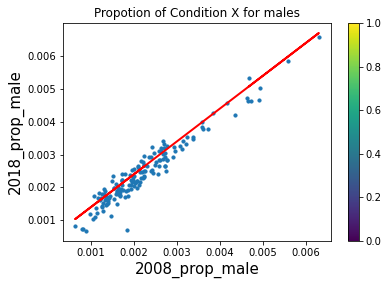

In [118]:
# The next lines create and save the plot for male data:

data_f = pd.read_csv('coursework_1_data_2019.csv')[['2008_prop_female','2018_prop_female']]
x = data_m['2008_prop_male']
y = data_m['2018_prop_male']

plt.scatter(x,y,s=10)
yhat = 0.9998*x + 0.0004
fig = plt.plot(x, yhat, lw=2, c='r', label='regression line')
plt.xlabel('2008_prop_male', fontsize=15)
plt.ylabel('2018_prop_male', fontsize=15)
plt.title('Propotion of Condition X for males')
plt.colorbar()

# Save this figure
plt.savefig('male_regression.png', dpi=300, bbox_inches = 'tight')

<AxesSubplot:>

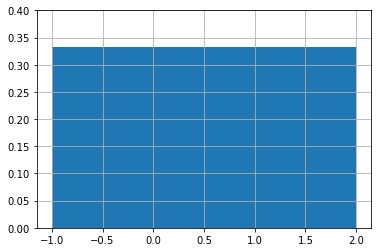

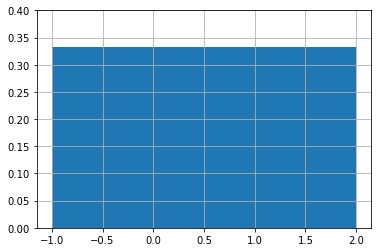

In [80]:
# Visualise the distribution of the data for male proportion (as histograms)

# Set common x-limits for the histograms:
# (using int() is a trick to round to the integer below)
hist_min = int(min(min1,min2)) - 1
hist_max = int(max(max1,max2)) + 2
x_range = [hist_min, hist_max]

# Set common y-limits for the histograms:
y_range = [0.0,0.4]

# Choose an appropriate number of columns for the histogram:
n_cols = hist_min, hist_max

# Now create the plots:
# (The plt.figure(x) functions create new plots preventing...
# ... both histograms from being drawn on the same axes.)

plt.figure(1)
data_m['2008_prop_male'].hist(range=x_range, bins=n_cols, density=True)
plt.ylim(y_range)

plt.figure(2)
plt.ylim(y_range)
data_m['2018_prop_male'].hist(range=x_range, bins=n_cols, density=True)

## 1.2 Hypothesis Test: male

 step1: state hypoythesis

In [55]:
# H0: The situation of Condition X of male does not reduced by intervension between 2008 and 2018
# H1: The situation of Condition X of male reduced by intervension between 2008 and 2018

step2: Set significance level:

In [ ]:
alpha = 0.05

step3-4: 

In [90]:
data1 = data_m['2008_prop_male']
data2 = data_m['2018_prop_male']

std_ratio = std1/std2

print("std_ratio =", std_ratio)

if std_ratio > 0.5 and std_ratio < 2:
    print("Can assume equal population standard deviations.")
    equal_stds = True
else:
    print("Cannot assume equal population standard deviations.")
    equal_stds = False
test_stat, p_value = sps.ttest_ind(data1, data2, equal_var = equal_stds)
print("p-value =", p_value)

std_ratio = 0.5555555555555556
Can assume equal population standard deviations.
p-value = 0.028744491973562145


step5: Conclusion

In [115]:
# Reach a conclusion:

alpha = 0.05
p_value = 0.028744491973562145

if p_value < alpha:
    print("p-value < significance threshold.")
    print("Reject H0. Accept H1.")
    print("Interventions have significant impact on male obesity between 2008 and 2018.")
elif p_value >= alpha:
    print("p-value >= significance threshold.")
    print("No significant evidence to reject H0.")
    print("Interventions have no significant impact on male obesity between 2008 and 2018.")

p-value < significance threshold.
Reject H0. Accept H1.
Interventions have significant impact on male obesity between 2008 and 2018.


# 2. Secondly plot female

## 2.1 Simple regression for female

In [52]:
#For convenience...

# Store each sample separately:
data1 = data_f['2008_prop_female']
data2 = data_f['2018_prop_female']

# Store some useful values

min1 = data1.min()
min2 = data2.min()

max1 = data1.max()
max2 = data2.max()

mean1 = data1.mean()
mean2 = data2.mean()

std1 = data1.std()
std2 = data2.std()

n1 = len(data1)
n2 = len(data2)

# And print some summary information:

data_f.describe()

,2008_prop_female,2018_prop_female
count,152.000000,152.000000
mean,0.003936,0.004346
std,0.001823,0.001839
min,0.000836,0.001183
25%,0.002649,0.003035
50%,0.003662,0.003961
75%,0.004730,0.005137
max,0.010138,0.010782


In [53]:
# Use the next line to set figure height and width (experiment to check the scale):
data_f = pd.read_csv('coursework_1_data_2019.csv')[['2008_prop_female','2018_prop_female']]


# These lines extract the y-values and the x-values from the data:
x_values = data_f['2008_prop_female']
y_values = data_f['2018_prop_female']

# These lines perform the regression procedure:
X_values = sms.add_constant(x_values)
regression_model_a = sms.OLS(y_values, X_values)
regression_model_b = regression_model_a.fit()
# and print a summary of the results:
print(regression_model_b.summary())
print() # blank line

# Now we store all the relevant values:
gradient  = regression_model_b.params[1]
intercept = regression_model_b.params[0]
Rsquared  = regression_model_b.rsquared
MSE       = regression_model_b.mse_resid
pvalue    = regression_model_b.f_pvalue

# And print them:
print("gradient  =", regression_model_b.params[1])
print("intercept =", regression_model_b.params[0])
print("Rsquared  =", regression_model_b.rsquared)
print("MSE       =", regression_model_b.mse_resid)
print("pvalue    =", regression_model_b.f_pvalue)


                            OLS Regression Results                            
Dep. Variable:       2018_prop_female   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     8164.
Date:                Sun, 14 Nov 2021   Prob (F-statistic):          1.09e-132
Time:                        18:50:28   Log-Likelihood:                 1047.3
No. Observations:                 152   AIC:                            -2091.
Df Residuals:                     150   BIC:                            -2085.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0004    4.8e-05  

/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


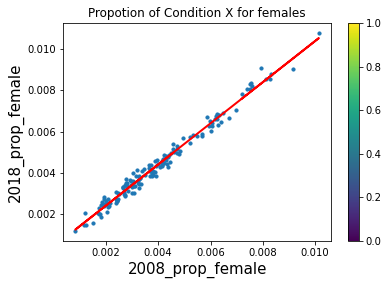

In [104]:
# The next lines create and save the plot for male data:

data_f = pd.read_csv('coursework_1_data_2019.csv')[['2008_prop_female','2018_prop_female']]
x = data_f['2008_prop_female']
y = data_f['2018_prop_female']

plt.scatter(x,y,s=10)
yhat = 0.9998*x + 0.0004
fig = plt.plot(x, yhat, lw=2, c='r', label='regression line')
plt.xlabel('2008_prop_female', fontsize=15)
plt.ylabel('2018_prop_female', fontsize=15)
plt.title('Propotion of Condition X for females')
plt.colorbar()

# Save this figure
plt.savefig('female_regression.png', dpi=300, bbox_inches = 'tight')

## 2.2 Hypothesis Test: female

<AxesSubplot:>

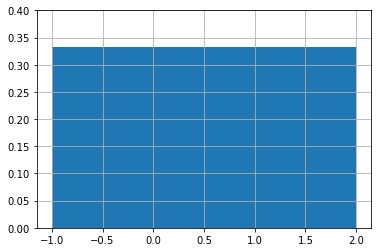

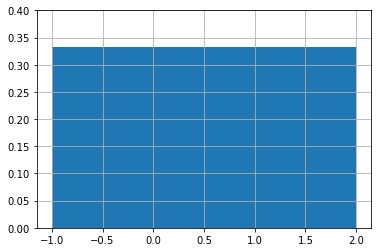

In [73]:
# Visualise the distribution of the data for male proportion (as histograms)

# Set common x-limits for the histograms:
# (using int() is a trick to round to the integer below)
hist_min = int(min(min1,min2)) - 1
hist_max = int(max(max1,max2)) + 2
x_range = [hist_min, hist_max]

# Set common y-limits for the histograms:
y_range = [0.0,0.4]

# Choose an appropriate number of columns for the histogram:
n_cols = hist_min, hist_max

# Now create the plots:
# (The plt.figure(x) functions create new plots preventing...
# ... both histograms from being drawn on the same axes.)

plt.figure(1)
data_f['2008_prop_female'].hist(range=x_range, bins=n_cols, density=True)
plt.ylim(y_range)

plt.figure(2)
plt.ylim(y_range)
data_f['2018_prop_female'].hist(range=x_range, bins=n_cols, density=True)

## 2.2 Hypothesis Test

 step1: state hypoythesis

In [55]:
# H0: The situation of Condition X of female does not reduced by intervension between 2008 and 2018
# H1: The situation of Condition X of female reduced by intervension between 2008 and 2018

step2: Set significance level:

In [ ]:
alpha = 0.05

In [ ]:
step3-4: 

In [82]:
data1 = data_f['2008_prop_female']
data2 = data_f['2018_prop_female']

std_ratio = std1/std2

print("std_ratio =", std_ratio)

if std_ratio > 0.5 and std_ratio < 2:
    print("Can assume equal population standard deviations.")
    equal_stds = True
else:
    print("Cannot assume equal population standard deviations.")
    equal_stds = False
test_stat, p_value = sps.ttest_ind(data1, data2, equal_var = equal_stds)
print("p-value =", p_value)

std_ratio = 0.5555555555555556
Can assume equal population standard deviations.
p-value = 0.051817033288467686


step5: Conclusion

In [116]:
# Reach a conclusion:

alpha = 0.05
p_value = 0.051817033288467686

if p_value < alpha:
    print("p-value < significance threshold.")
    print("Reject H0. Accept H1.")
    print("Interventions have significant impact on female obesity between 2008 and 2018.")
elif p_value >= alpha:
    print("p-value >= significance threshold.")
    print("No significant evidence to reject H0.")
    print("Interventions have no significant impact on male obesity between 2008 and 2018.")

p-value >= significance threshold.
No significant evidence to reject H0.
Interventions have no significant impact on male obesity between 2008 and 2018.
